<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/Logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)


In [3]:
np.bincount(y_train)

array([35, 35, 35])

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std= sc.transform(X_train)
X_test_std= sc.transform(X_test)
#Note that we used the same scaling parameters to 
# standardize the test dataset so that both the values 
# in the training and test dataset are comparable to each other.

In [5]:
X_test_std.mean()

-0.024516396323407026

In [6]:
X_train_std.mean()

1.0150610510858574e-16

In [7]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)


Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred=ppn.predict(X_test_std)

In [9]:
np.sum(y_pred!=y_test)

1

In [10]:
from sklearn.metrics import accuracy_score
s=accuracy_score(y_test,y_pred) # 1- num_of_missclassify/total

In [11]:
s

0.9777777777777777

In [12]:
# create region line
from matplotlib.colors import ListedColormap
import  matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                  alpha=0.8, c=colors[idx],
                  marker=markers[idx], label=cl,
                  edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


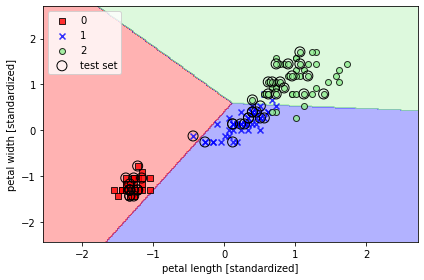

In [13]:
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined_std=np.hstack((y_train,y_test))
plot_decision_regions(X_combined_std,y_combined_std,ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

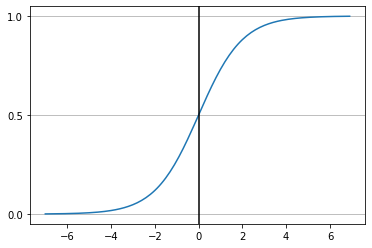

In [18]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))
x=np.arange(-7,7,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.axvline(0.0,color='k')
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)

5.01734233489918e-05


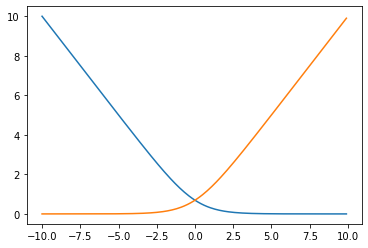

In [25]:
def cost_1(z):
  return -np.log(sigmoid(z))
def cost_0(z):
  return -np.log(1-sigmoid(z))
x=np.arange(-10,10,0.1)
# x goes from 0 to 0.99
y=[cost_1(m) for m in x]
print(min(y))
plt.plot(x,y)
y1=[cost_0(m) for m in x ]
plt.plot(x,y1)

[0.5915331515515313, 0.4469962795516352, 0.35889435067712355, 0.30083579696406, 0.2599670173795526, 0.22967909971712588, 0.20631948656953497, 0.18773046357826245, 0.17256309591824856, 0.15993323869663292, 0.14923803587010906, 0.14005253020902245, 0.1320685834489627, 0.12505728339906064, 0.11884496992364227, 0.11329746500249055, 0.10830941348633163, 0.10379690319541315, 0.09969224528003708, 0.0959402114198567, 0.09249527437692667, 0.08931955281079475, 0.08638125898584818, 0.08365351123360186, 0.08111341477864681, 0.07874134260850835, 0.0765203672645955, 0.07443580776444116, 0.0724748652591605, 0.07062632773659981, 0.06888032892791866, 0.06722815011911613, 0.06566205618758517, 0.06417515913811692, 0.06276130388505673, 0.06141497214622351, 0.06013120117159564, 0.05890551469189959, 0.057733863987339075, 0.056612577380213254, 0.0555383167733526, 0.054508040108755575, 0.05351896882230928, 0.05256855953220967, 0.05165447932920448, 0.050774584142636504, 0.04992689974253586, 0.04910960500864977

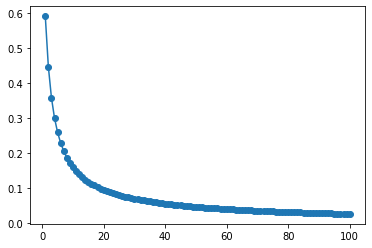

In [56]:
from operator import xor
import numpy as np
class Logistic_reg():
  def __init__(self,lr,iter,randomstate):
    self.lr=lr
    self.iter=iter
    self.random_state=randomstate
  def initialize_weight(self,X):
    rgen=np.random.RandomState(self.random_state).normal(size=X.shape[1]+1,loc=0.0,scale=0.01)
    return rgen
  def net_input(self,X):
    return np.dot(X,self.W[1:])+self.W[0]
  def sigmoid(self,z):
    return 1.0/(1.0+np.exp(-z)) 
  def cost_function(self,X,y):
    Z=self.net_input(X)
    a=self.sigmoid(Z)
    return -y*np.log(a)-(1-y)*np.log(1-a)
  def update_weight(self,X,y_target):
    Z=self.net_input(X)
    A=self.sigmoid(Z)
    update=self.lr*((-y_target*(1/A)+(1-y_target)*(1/(1-A)))*A*(1-A))
    self.W[1:]-=np.dot(X.T,update)
    self.W[0]-=np.sum(update)
  def fit(self,X,y):
    self.error=[]
    self.W=self.initialize_weight(X)
    for _ in range(self.iter):
      cost=[]
      for x,y_target in zip(X,y):
        self.update_weight(x,y_target)
        cost.append(self.cost_function(x,y_target))
      avg_cost=sum(cost)/len(y)
      self.error.append(avg_cost)
  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, 0)
import pandas as pd
import matplotlib.pyplot as plt
#load dataset
df=pd.read_csv('Iris.csv')
X=df.iloc[:100,[1,3]].values
y=df.iloc[:100,5].values
y=np.where(y=='Iris-setosa',0,1)
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=1,stratify=y)
ada_sgd = Logistic_reg(iter=100, lr=0.01, randomstate=1)
ada_sgd.fit(X_train, y_train)
print(ada_sgd.error)
plt.plot(range(1, len(ada_sgd.error) + 1), ada_sgd.error, marker='o')
y_pred=ada_sgd.predict(X_test)
from sklearn.metrics import accuracy_score
s=accuracy_score(y_test,y_pred) # 1- num_of_missclassify/total

In [57]:
s

1.0

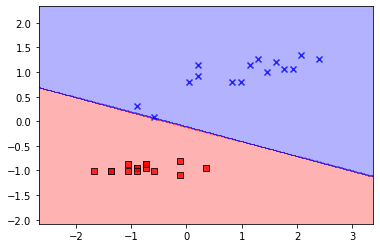

In [59]:
plot_decision_regions(X_test, y_test, ada_sgd, test_idx=None,resolution=0.02)